<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import Modules necessary for running this notebook 
</p>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import function file necessary for running this notebook 
</p>

In [2]:
import fun_CondProb as fn

<span style="font-family: 'Times New Roman'; font-size: 32px; color: red;"> List available FACTS Data:: <br> </span>
<span style="font-size: 22px; color: green;"> :: FACTS 1.0 run</span> 
    

In [3]:
ssp='ssp585'
path = f'/projects/kopp/facts-experiments/221217/coupling.{ssp}/output/'
files=fn.list_files_with_names(path, ["global", "AIS"])
#
df = pd.DataFrame(files, columns=['File Name']).reset_index().rename(columns={'index': 'Index'})
print(df.to_string(index=False))

 Index                                                    File Name
     0     coupling.ssp585.ar5AIS.ipccar5.icesheets_AIS_globalsl.nc
     1    coupling.ssp585.ar5AIS.ipccar5.icesheets_EAIS_globalsl.nc
     2    coupling.ssp585.ar5AIS.ipccar5.icesheets_WAIS_globalsl.nc
     3  coupling.ssp585.bamber19.bamber19.icesheets_AIS_globalsl.nc
     4 coupling.ssp585.bamber19.bamber19.icesheets_EAIS_globalsl.nc
     5 coupling.ssp585.bamber19.bamber19.icesheets_WAIS_globalsl.nc
     6      coupling.ssp585.deconto21.deconto21.AIS_AIS_globalsl.nc
     7     coupling.ssp585.deconto21.deconto21.AIS_EAIS_globalsl.nc
     8     coupling.ssp585.deconto21.deconto21.AIS_WAIS_globalsl.nc
     9       coupling.ssp585.emuAIS.emulandice.AIS_EAIS_globalsl.nc
    10        coupling.ssp585.emuAIS.emulandice.AIS_PEN_globalsl.nc
    11       coupling.ssp585.emuAIS.emulandice.AIS_WAIS_globalsl.nc
    12            coupling.ssp585.emuAIS.emulandice.AIS_globalsl.nc
    13           coupling.ssp585.larmip.larmip.A

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<p style="font-size: 32px; color: green;">&#10145; Choose <span style="color: blue;">AIS</span> data file.</p>

In [4]:
#
start_year=2020; end_year=2100; unit='cm'; station=0


# AIS from Emulator module.
AIS_emu_path=f'{path}/coupling.ssp585.emuAIS.emulandice.AIS_globalsl.nc'
var = 'emu'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from Larmip module.
AIS_lar_path=f'{path}/coupling.ssp585.larmip.larmip.AIS_globalsl.nc'
var = 'lar'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")


# AIS from the IPCC AR5 module.
AIS_ar5_path=f'{path}/coupling.ssp585.ar5AIS.ipccar5.icesheets_AIS_globalsl.nc'
var = 'ar5'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the IPCC Deconto_21 module.
AIS_d21_path=f'{path}/coupling.ssp585.deconto21.deconto21.AIS_AIS_globalsl.nc'
var = 'd21'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the Bamber 19 module.
AIS_b19_path=f'{path}/coupling.ssp585.bamber19.bamber19.icesheets_AIS_globalsl.nc'
var = 'b19'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    Select Plot data.
</span>
<br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: Extract all samples from a particulay year 
</span>

In [5]:
def get_axis_data(dum_slc, dum_time, *specific_year):
    return [dum_slc[:, dum_time == t].squeeze() for t in specific_year]

In [6]:
T1=2030; T2=2050; T3=2070; T4=2100

var = 'lar'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")
var = 'ar5'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")
var = 'd21'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")
var = 'b19'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    Plot::
</span>
<br>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: black;"> Larmip AIS </span>

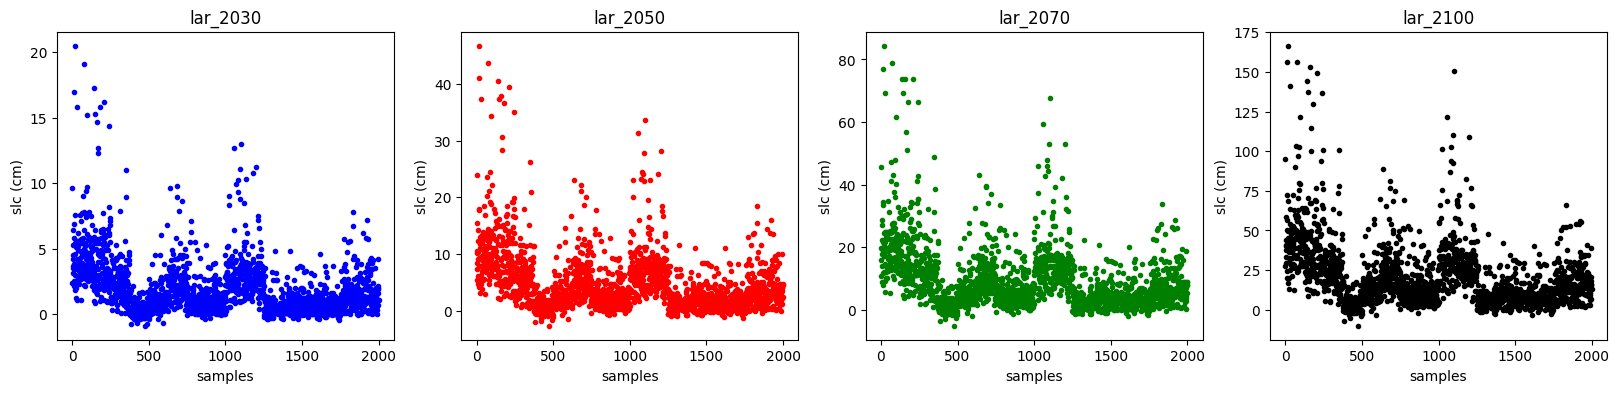

In [7]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
var = 'lar'; T1=2030; T2=2050; T3=2070; T4=2100  
ax[0].plot(eval(f'{var}_{T1}'), color='b', marker='.', linestyle='none'); ax[0].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T1}');
ax[1].plot(eval(f'{var}_{T2}'), color='r', marker='.', linestyle='none'); ax[1].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T2}');
ax[2].plot(eval(f'{var}_{T3}'), color='g', marker='.', linestyle='none'); ax[2].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T3}');
ax[3].plot(eval(f'{var}_{T4}'), color='k', marker='.', linestyle='none'); ax[3].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T4}');

<br>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: black;"> AR5 AIS </span>

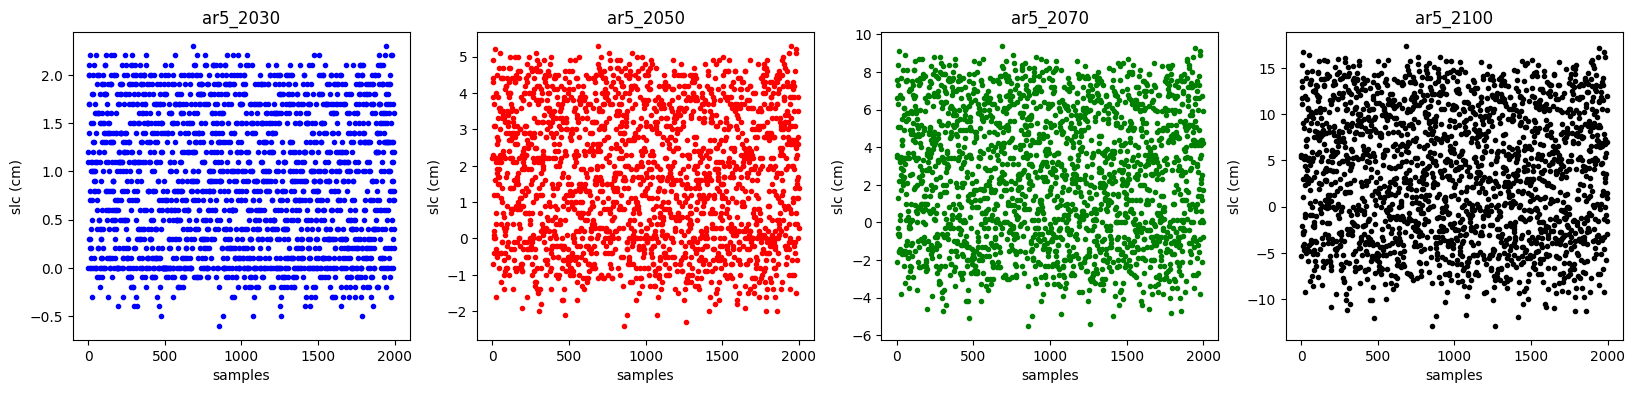

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
var = 'ar5'; T1=2030; T2=2050; T3=2070; T4=2100  
ax[0].plot(eval(f'{var}_{T1}'), color='b', marker='.', linestyle='none'); ax[0].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T1}');
ax[1].plot(eval(f'{var}_{T2}'), color='r', marker='.', linestyle='none'); ax[1].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T2}');
ax[2].plot(eval(f'{var}_{T3}'), color='g', marker='.', linestyle='none'); ax[2].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T3}');
ax[3].plot(eval(f'{var}_{T4}'), color='k', marker='.', linestyle='none'); ax[3].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T4}');

<br>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: black;"> deconto 21 AIS </span>

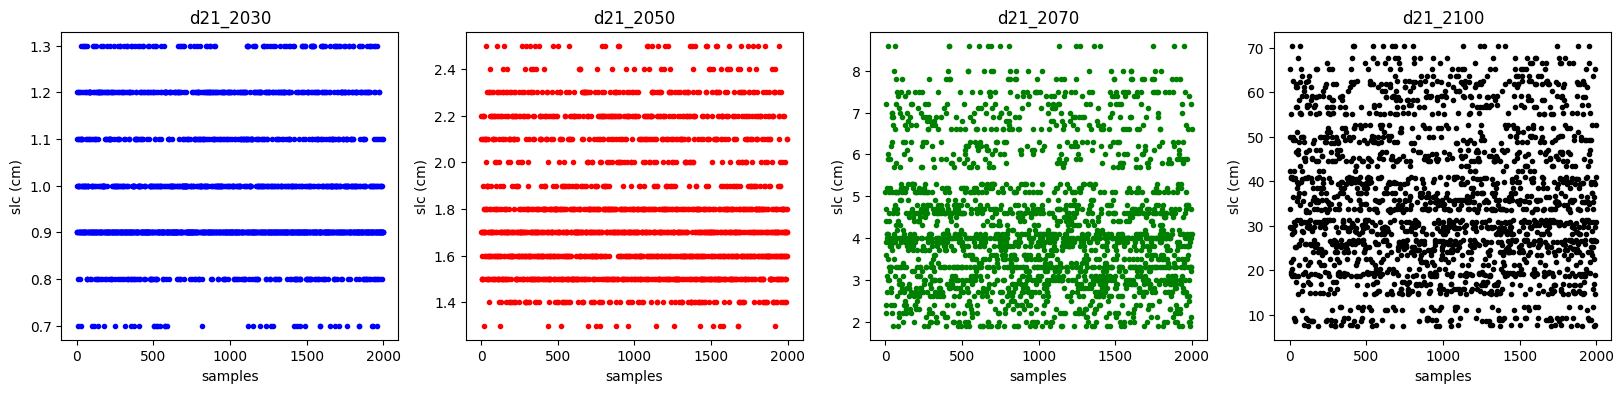

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
var = 'd21'; T1=2030; T2=2050; T3=2070; T4=2100  
ax[0].plot(eval(f'{var}_{T1}'), color='b', marker='.', linestyle='none'); ax[0].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T1}');
ax[1].plot(eval(f'{var}_{T2}'), color='r', marker='.', linestyle='none'); ax[1].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T2}');
ax[2].plot(eval(f'{var}_{T3}'), color='g', marker='.', linestyle='none'); ax[2].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T3}');
ax[3].plot(eval(f'{var}_{T4}'), color='k', marker='.', linestyle='none'); ax[3].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T4}');

<br>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: black;"> bamber 19 AIS </span>

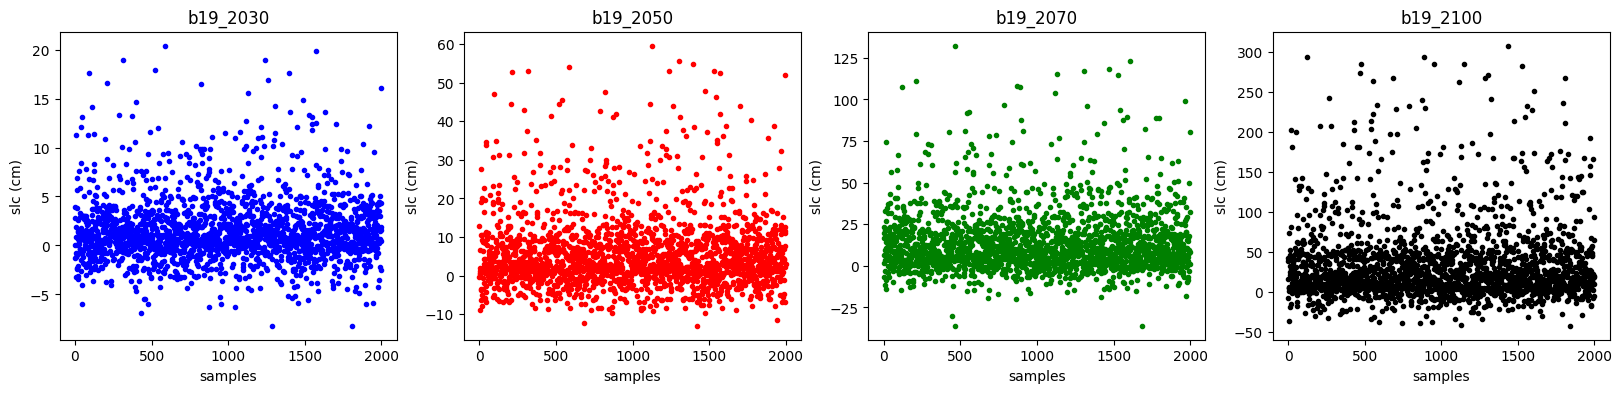

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
var = 'b19'; T1=2030; T2=2050; T3=2070; T4=2100  
ax[0].plot(eval(f'{var}_{T1}'), color='b', marker='.', linestyle='none'); ax[0].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T1}');
ax[1].plot(eval(f'{var}_{T2}'), color='r', marker='.', linestyle='none'); ax[1].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T2}');
ax[2].plot(eval(f'{var}_{T3}'), color='g', marker='.', linestyle='none'); ax[2].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T3}');
ax[3].plot(eval(f'{var}_{T4}'), color='k', marker='.', linestyle='none'); ax[3].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T4}');

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
     sklearn KDE
</span>
<br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    Visualize the data like in 
    <a href=" https://doi.org/10.1029/2019JF005418"><b>Gilford20</b></a>
    Figure_4b  
</span>

<p>Approach — </p>
<ol>
    <li>Use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html">sklearn.neighbors.KernelDensity</a> to fit a 2-d kernel density estimate to the pairs of, for example, (2030, 2100) in a <code> 2D matrix</code>.</li>
    <li>Create a grid of test points. Based on the <code>max/min</code> of each column, create a meshgrid <code> grid_samples</code>.</li>
    <li>Use the <code>score_samples</code> method of the kernel density estimate to determine a weight for each test point.<br><code>log_density_values = kde.score_samples(grid_samples)</code></li>
    <li>Convert it to density <code>expo(log_density_values)</code>
    <li>Normalize the weights column wise. <i>Divide individual column value by column sum.</i></li>
    <li>Convert back to log values. </li>
    <li>Do a filled contour plot as in Gilford20.<br>
</ol>


<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: visualize  :: Larmip
</span>

In [15]:
# # Single Year

# fig, ax = plt.subplots(1, 4, figsize=(20, 4))
# #
# VAR1='lar'; T1=2030; T2=2100; K='gaussian'; BW=1; linspace_int=100; scatter='NO'
# xaxLAB=f'{VAR1}_{T1}';   xaxVAR=eval(xaxLAB); yaxLAB=f'{VAR1}_{T2}';   yaxVAR=eval(yaxLAB)
# title='AIS GMSL contribution in 2100 \n as a function of \n 2023 AIS GMSL contribution'
# #
# p0=fn.gilford(ax[0],xaxVAR, yaxVAR,K,BW,linspace_int, 'density_values',xaxLAB,yaxLAB,title,scatter,'Reds',T1)
# p1=fn.gilford(ax[1],xaxVAR, yaxVAR,K,BW,linspace_int, 'density_values_Normalized',xaxLAB,yaxLAB,title,scatter,'Reds',T1)
# p2=fn.gilford(ax[2],xaxVAR, yaxVAR,K,BW,linspace_int, 'log_density_values',xaxLAB,yaxLAB,title,scatter,'Reds',T1)
# p3=fn.gilford(ax[3],xaxVAR, yaxVAR,K,BW,linspace_int, 'log_density_values_Normalized',xaxLAB,yaxLAB,title,scatter,'Reds',T1)

In [16]:
# fig, ax = plt.subplots(4, 3, figsize=(20, 16)); fig.subplots_adjust(wspace=0.3, hspace=0.5)  

# VAR1='lar'; T1=2030; T2=2100; K='gaussian'; BW=1; linspace_int=100; scatter='NO'
# xaxLAB=f'{VAR1}_{T1}';   xaxVAR=eval(xaxLAB); yaxLAB=f'{VAR1}_{T2}';   yaxVAR=eval(yaxLAB)
# title=f'AIS GMSL contribution in T2 \n as a function of T1 AIS GMSL contribution'
# #
# fn.gilford(ax[0,0],xaxVAR, yaxVAR,K,BW,linspace_int, 'density_values',xaxLAB,yaxLAB,title,scatter,'Reds',T1)
# fn.gilford(ax[1,0],xaxVAR, yaxVAR,K,BW,linspace_int, 'density_values_Normalized',xaxLAB,yaxLAB,title,scatter,'Reds',T1)
# fn.gilford(ax[2,0],xaxVAR, yaxVAR,K,BW,linspace_int, 'log_density_values',xaxLAB,yaxLAB,title,scatter,'Reds',T1)
# fn.gilford(ax[3,0],xaxVAR, yaxVAR,K,BW,linspace_int, 'log_density_values_Normalized',xaxLAB,yaxLAB,title,scatter,'Reds',T1)

# VAR1='lar'; T1=2050; T2=2100; K='gaussian'; BW=1; linspace_int=100; scatter='NO'
# xaxLAB=f'{VAR1}_{T1}';   xaxVAR=eval(xaxLAB); yaxLAB=f'{VAR1}_{T2}';   yaxVAR=eval(yaxLAB)
# title=f'AIS GMSL contribution in T2 \n as a function of T1 AIS GMSL contribution'
# #
# fn.gilford(ax[0,1],xaxVAR, yaxVAR,K,BW,linspace_int, 'density_values',xaxLAB,yaxLAB,title,scatter,'Reds',T1)
# fn.gilford(ax[1,1],xaxVAR, yaxVAR,K,BW,linspace_int, 'density_values_Normalized',xaxLAB,yaxLAB,title,scatter,'Reds',T1)
# fn.gilford(ax[2,1],xaxVAR, yaxVAR,K,BW,linspace_int, 'log_density_values',xaxLAB,yaxLAB,title,scatter,'Reds',T1)
# fn.gilford(ax[3,1],xaxVAR, yaxVAR,K,BW,linspace_int, 'log_density_values_Normalized',xaxLAB,yaxLAB,title,scatter,'Reds',T1)


# VAR1='lar'; T1=2070; T2=2100; K='gaussian'; BW=1; linspace_int=100; scatter='NO'
# xaxLAB=f'{VAR1}_{T1}';   xaxVAR=eval(xaxLAB); yaxLAB=f'{VAR1}_{T2}';   yaxVAR=eval(yaxLAB)
# title=f'AIS GMSL contribution in T2 \n as a function of T1 AIS GMSL contribution'
# #
# fn.gilford(ax[0,2],xaxVAR, yaxVAR,K,BW,linspace_int, 'density_values',xaxLAB,yaxLAB,title,scatter,'Reds',T1)
# fn.gilford(ax[1,2],xaxVAR, yaxVAR,K,BW,linspace_int, 'density_values_Normalized',xaxLAB,yaxLAB,title,scatter,'Reds',T1)
# fn.gilford(ax[2,2],xaxVAR, yaxVAR,K,BW,linspace_int, 'log_density_values',xaxLAB,yaxLAB,title,scatter,'Reds',T1)
# fn.gilford(ax[3,2],xaxVAR, yaxVAR,K,BW,linspace_int, 'log_density_values_Normalized',xaxLAB,yaxLAB,title,scatter,'Reds',T1)

<span style="font-family: 'Times New Roman'; font-size: 12pt; color: green;">
    use :: <i>O P T I M I Z E D</i>  :: plotting script.
</span>

UnboundLocalError: local variable 'PLOT_VAR' referenced before assignment

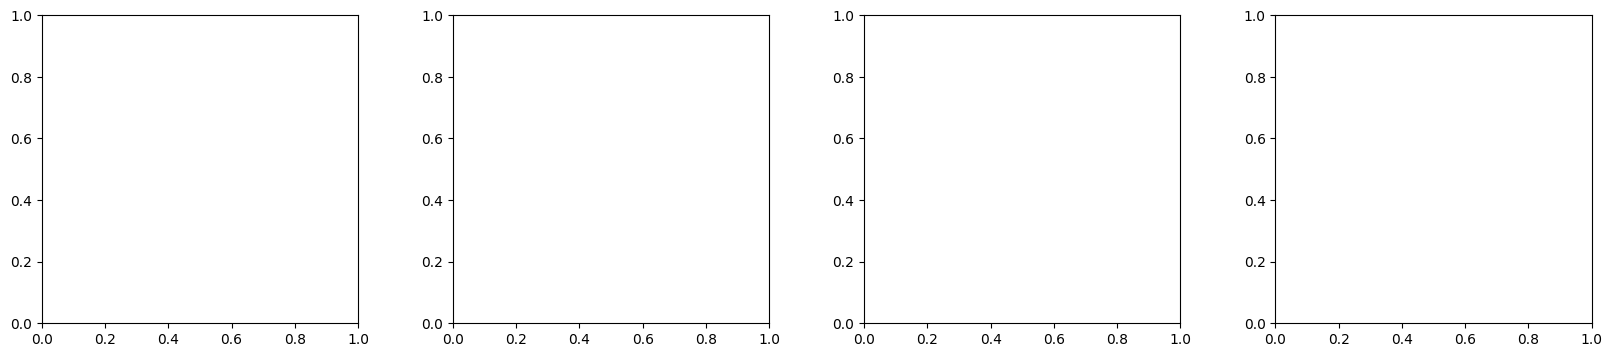

In [14]:
# fig, ax = plt.subplots(4, 3, figsize=(20, 16))
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
fig.subplots_adjust(wspace=0.3, hspace=0.5)
#
VAR1 = 'lar';  T1_values = [2030, 2050, 2070];  T2 = 2100;
plot_types = ['density_values_Normalized']
K = 'gaussian'; BW = 1; linspace_int = 100; scatter = 'NO'
#
for col_index, T1 in enumerate(T1_values):
    # 
    xaxLAB = f'{VAR1}_{T1}';   xaxVAR = eval(xaxLAB)
    yaxLAB = f'{VAR1}_{T2}';   yaxVAR = eval(yaxLAB)
    title = f'AIS GMSL contribution in {T2} \n as a function of {T1} AIS GMSL contribution'
    # Plot row
    for plot_type in enumerate(plot_types):
        fn.gilford(ax[col_index], xaxVAR, yaxVAR, K, BW, linspace_int, plot_type, xaxLAB, yaxLAB, title, scatter,'Reds',T1)

<div style="width: 50%; margin: auto;">
    <hr style="border: none; height: 2px; background-color: yellow; border-style: dotted;">
</div>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: visualize  :: AR5
</span>

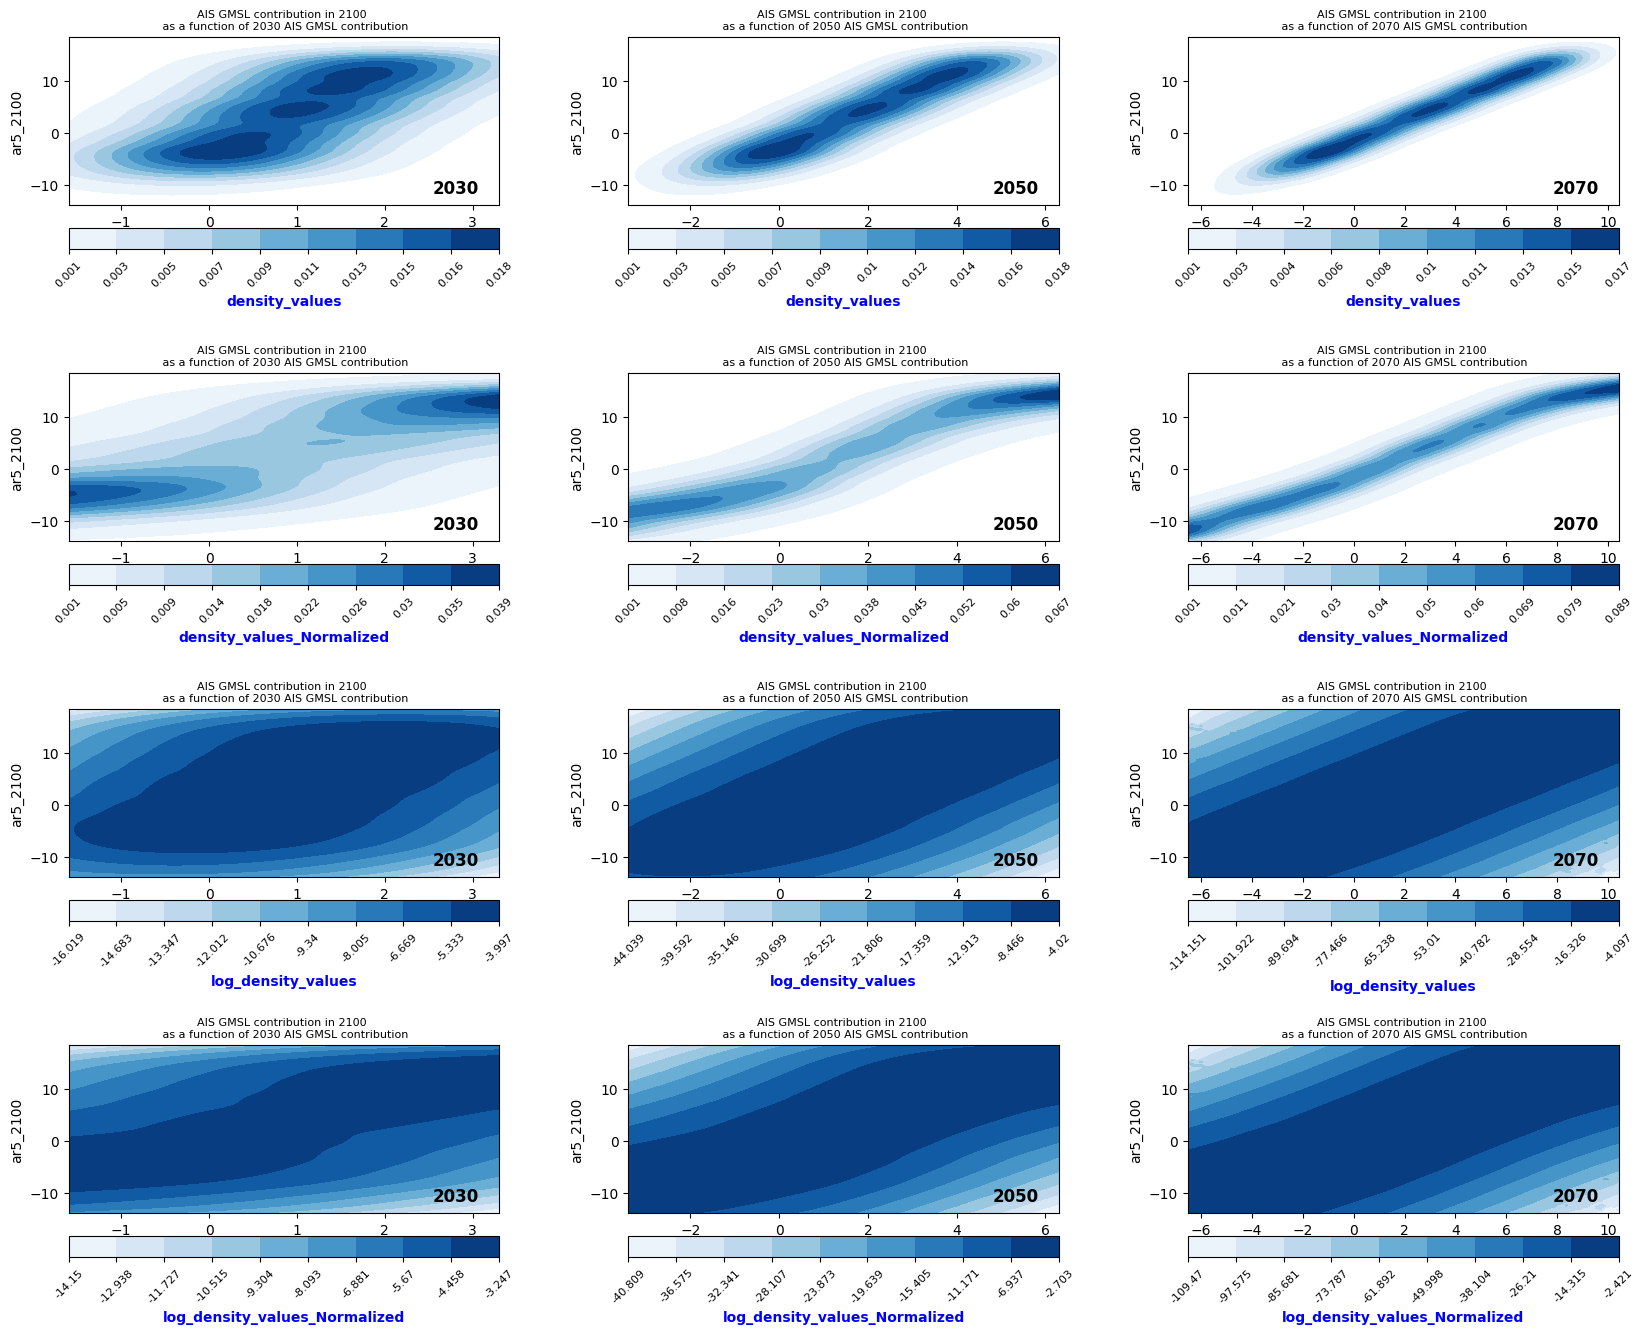

In [18]:
fig, ax = plt.subplots(4, 3, figsize=(20, 16))
fig.subplots_adjust(wspace=0.3, hspace=0.5)
#
VAR1 = 'ar5';  T1_values = [2030, 2050, 2070];  T2 = 2100;
plot_types = ['density_values', 'density_values_Normalized', 'log_density_values', 'log_density_values_Normalized']
K = 'gaussian'; BW = 1; linspace_int = 100; scatter = 'NO'
#
for col_index, T1 in enumerate(T1_values):
    # 
    xaxLAB = f'{VAR1}_{T1}';   xaxVAR = eval(xaxLAB)
    yaxLAB = f'{VAR1}_{T2}';   yaxVAR = eval(yaxLAB)
    title = f'AIS GMSL contribution in {T2} \n as a function of {T1} AIS GMSL contribution'
    # Plot row
    for row_index, plot_type in enumerate(plot_types):
        fn.gilford(ax[row_index, col_index], xaxVAR, yaxVAR, K, BW, linspace_int, plot_type, xaxLAB, yaxLAB, title, scatter,'Blues',T1)

<div style="width: 50%; margin: auto;">
    <hr style="border: none; height: 2px; background-color: yellow; border-style: dotted;">
</div>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: visualize  :: d21
</span>

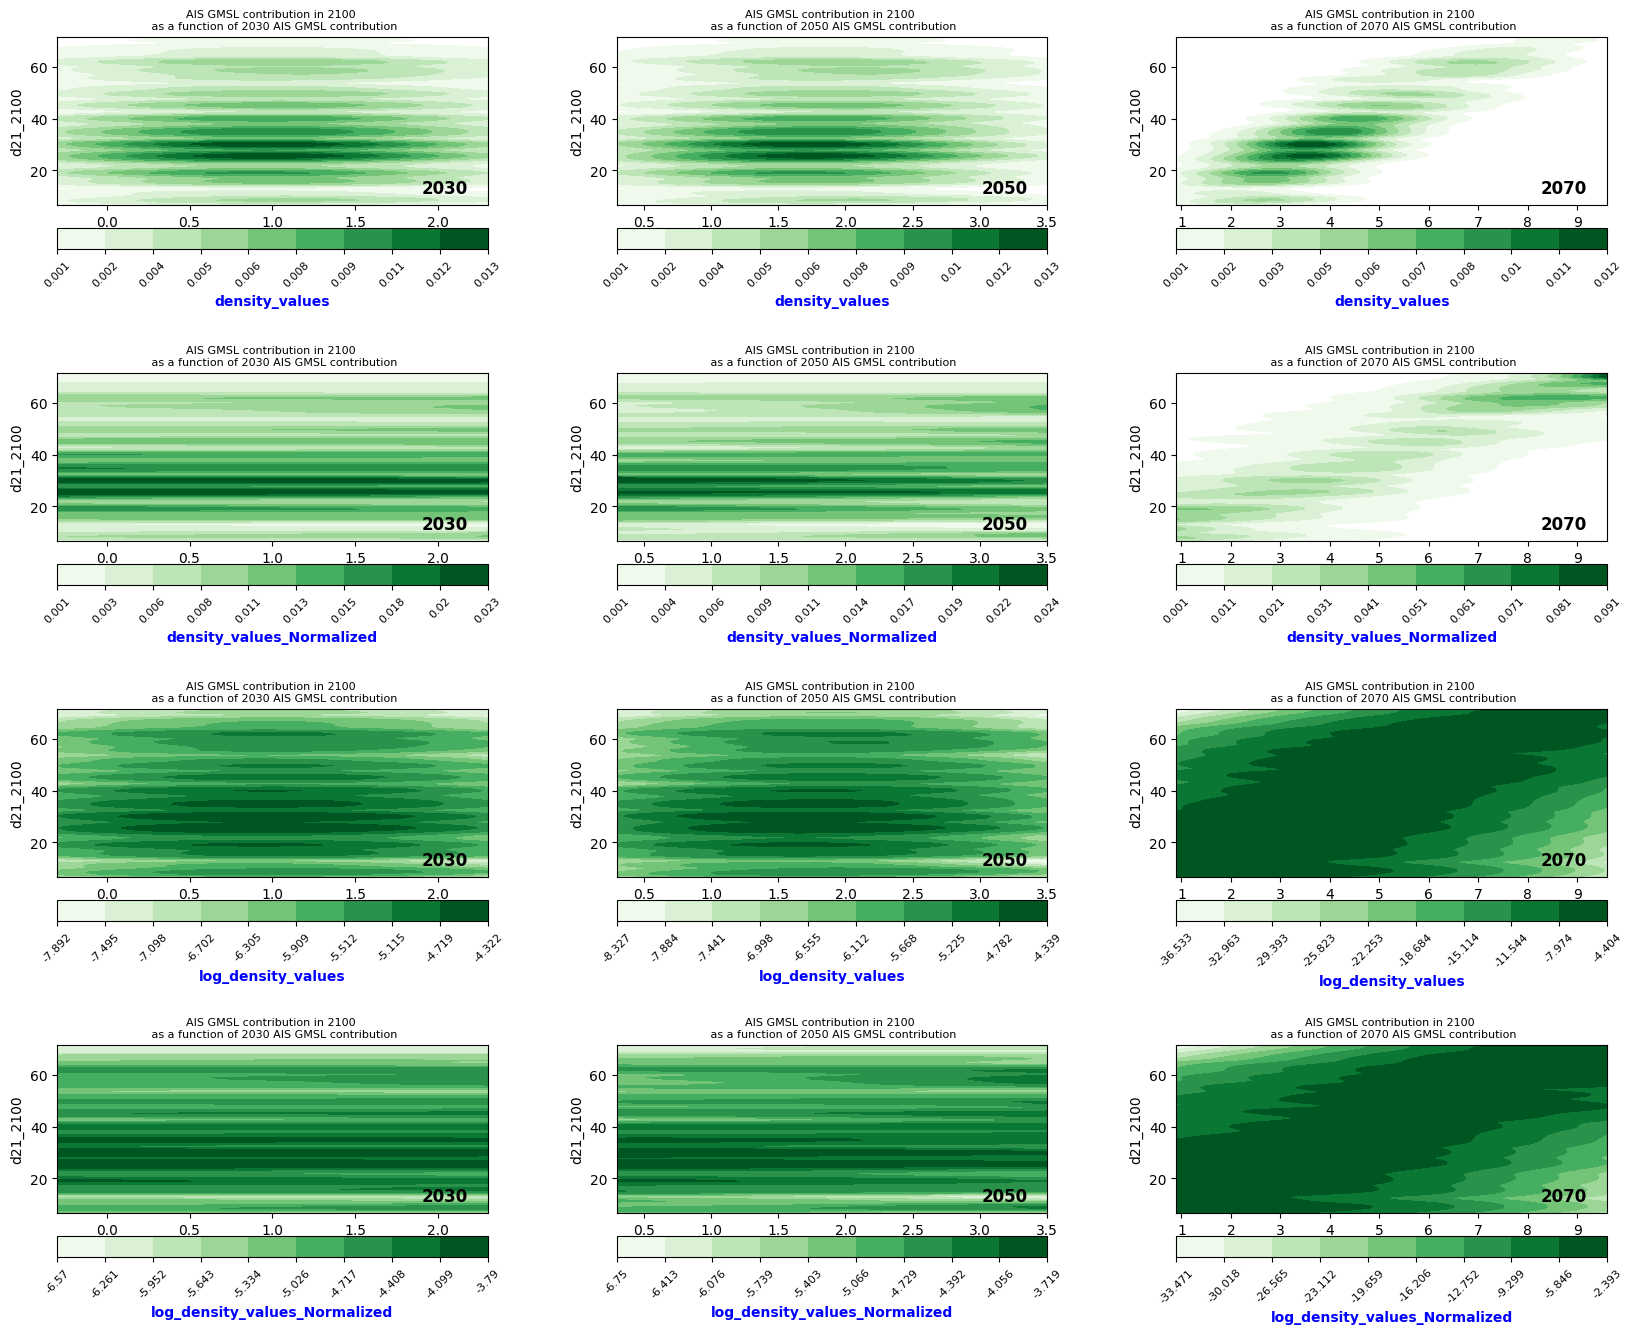

In [19]:
fig, ax = plt.subplots(4, 3, figsize=(20, 16))
fig.subplots_adjust(wspace=0.3, hspace=0.5)
#
VAR1 = 'd21';  T1_values = [2030, 2050, 2070];  T2 = 2100;
plot_types = ['density_values', 'density_values_Normalized', 'log_density_values', 'log_density_values_Normalized']
K = 'gaussian'; BW = 1; linspace_int = 100; scatter = 'NO'
#
for col_index, T1 in enumerate(T1_values):
    # 
    xaxLAB = f'{VAR1}_{T1}';   xaxVAR = eval(xaxLAB)
    yaxLAB = f'{VAR1}_{T2}';   yaxVAR = eval(yaxLAB)
    title = f'AIS GMSL contribution in {T2} \n as a function of {T1} AIS GMSL contribution'
    # Plot row
    for row_index, plot_type in enumerate(plot_types):
        fn.gilford(ax[row_index, col_index], xaxVAR, yaxVAR, K, BW, linspace_int, plot_type, xaxLAB, yaxLAB, title, scatter,'Greens',T1)

<div style="width: 50%; margin: auto;">
    <hr style="border: none; height: 2px; background-color: yellow; border-style: dotted;">
</div>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: visualize  :: b19
</span>

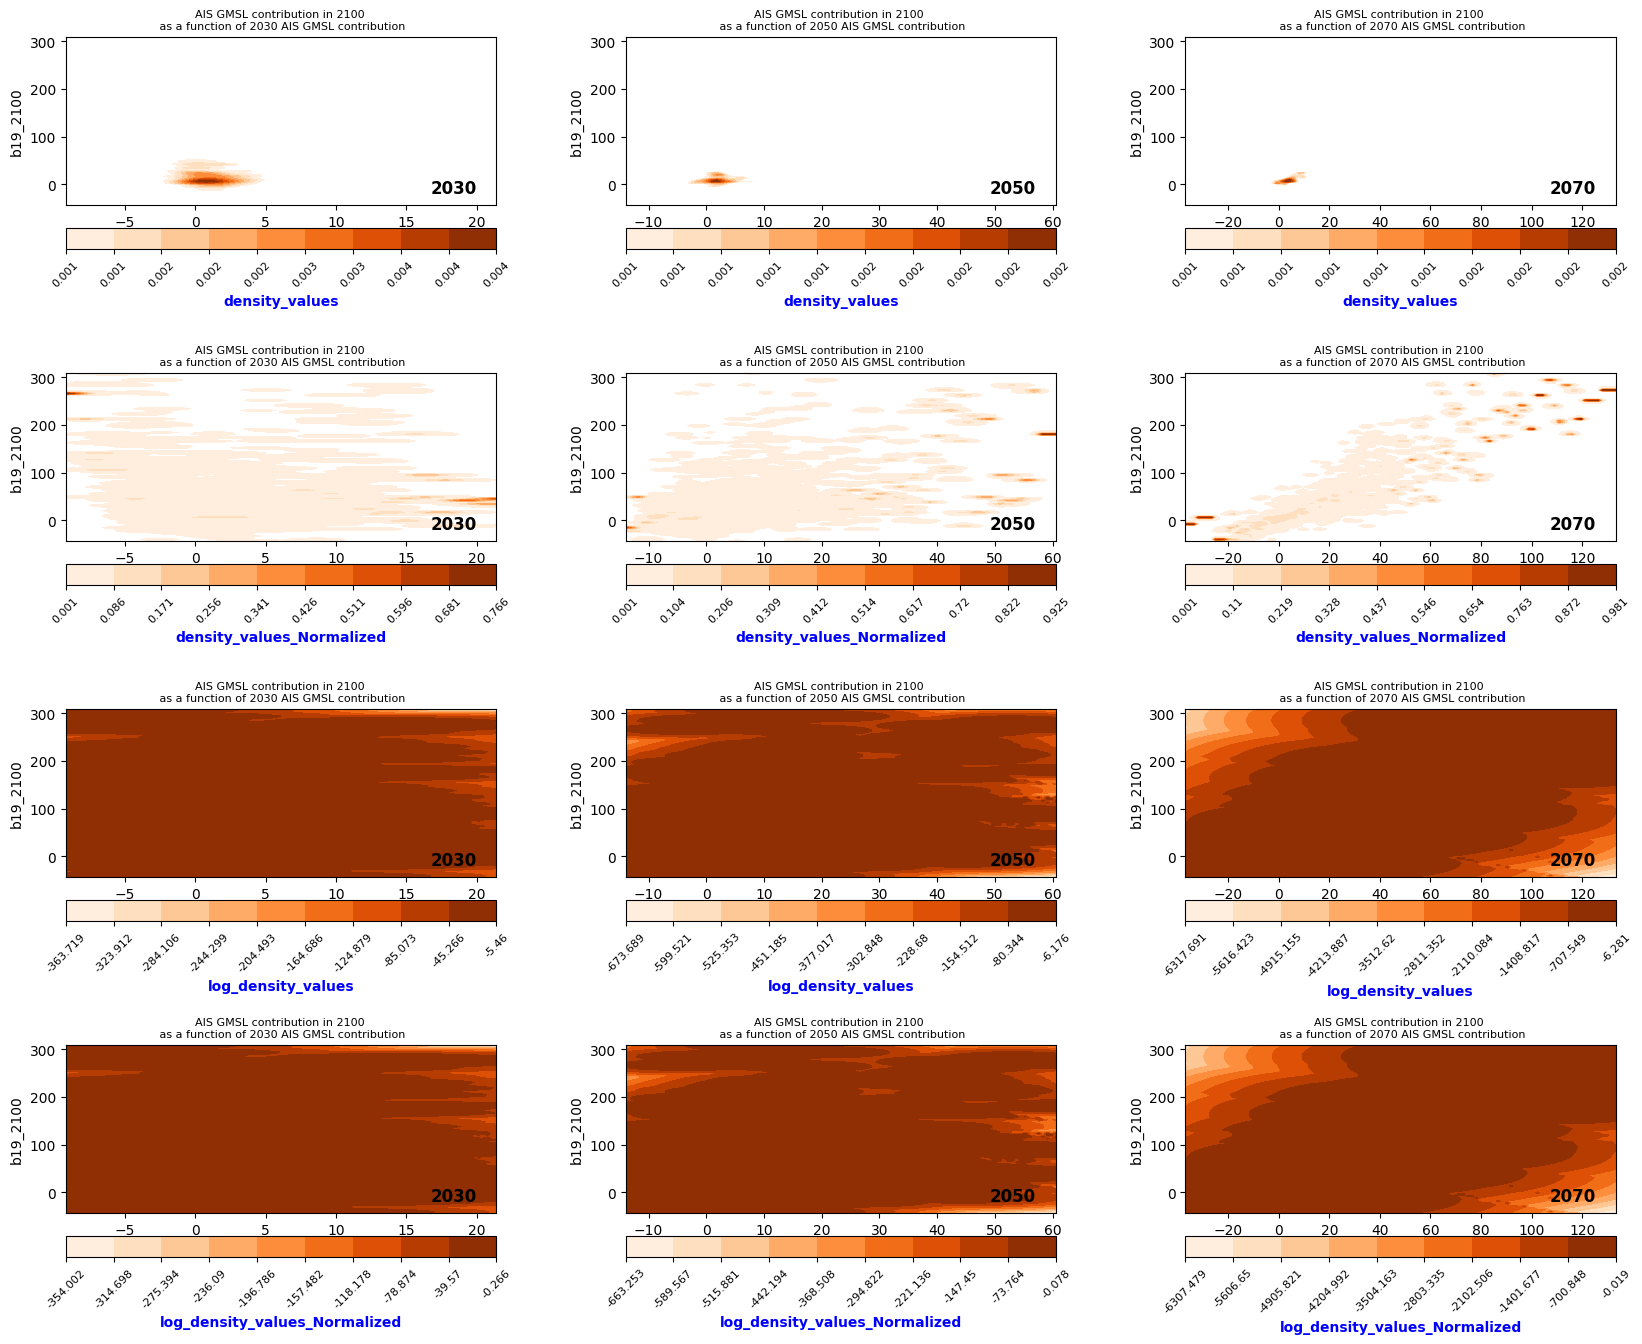

In [20]:
fig, ax = plt.subplots(4, 3, figsize=(20, 16))
fig.subplots_adjust(wspace=0.3, hspace=0.5)
#
VAR1 = 'b19';  T1_values = [2030, 2050, 2070];  T2 = 2100;
plot_types = ['density_values', 'density_values_Normalized', 'log_density_values', 'log_density_values_Normalized']
K = 'gaussian'; BW = 1; linspace_int = 100; scatter = 'NO'
#
for col_index, T1 in enumerate(T1_values):
    # 
    xaxLAB = f'{VAR1}_{T1}';   xaxVAR = eval(xaxLAB)
    yaxLAB = f'{VAR1}_{T2}';   yaxVAR = eval(yaxLAB)
    title = f'AIS GMSL contribution in {T2} \n as a function of {T1} AIS GMSL contribution'
    # Plot row
    for row_index, plot_type in enumerate(plot_types):
        fn.gilford(ax[row_index, col_index], xaxVAR, yaxVAR, K, BW, linspace_int, plot_type, xaxLAB, yaxLAB, title, scatter,'Oranges',T1)

<p>Links — </p>
 <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html\">sklearn.neighbors.KernelDensity</a>
 <br>
<a href="https://scikit-learn.org/stable/modules/density.html#kernel-density-estimation\"> kernel-density-estimation</a>

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">